**Exercise 7.11**. Simulate an MA(1) series with $\theta = −0.6$ and $n = 48$.

**(a)** Find the maximum likelihood estimate of $\theta$.

**(b)** If your software permits, repeat part (a) many times with a new simulated series using the same parameters and same sample size.

**(c)** Form the sampling distribution of the maximum likelihood estimates of $\theta$.

**(d)** Are the estimates (approximately) unbiased?

**(e)** Calculate the variance of your sampling distribution and compare it with the large-sample result in Equation (7.4.11) on page 161.

**Solution**.

In [1]:
require(ggplot2)
require(latex2exp)

Loading required package: ggplot2

Loading required package: latex2exp



In [2]:
B = 10000
estimates = rep(NA, B)

set.seed(0)
pb = txtProgressBar(1, B, style=3)
for (i in 1:B) {
    estimates[i] = -arima(arima.sim(model=list(ma=0.6), n=48), order=c(0,0,1), method='ML')$coef[[1]]
    setTxtProgressBar(pb, i)
}

  |======================================================================| 100%

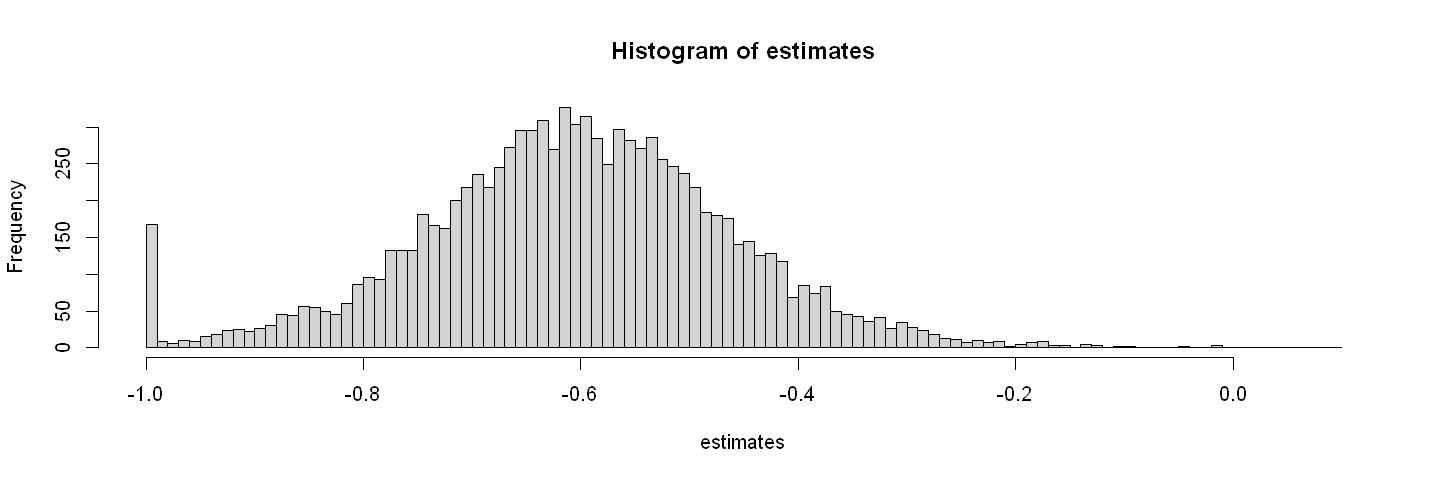

In [3]:
options(repr.plot.width=12, repr.plot.height=4)

hist(estimates, breaks=100)

In [4]:
print(c('Bootstrap estimate mean: ', round(mean(estimates), 3)), quote=F)
print(c('Bootstrap estimate SE:   ', round(sqrt(var(estimates)), 3)), quote=F)
print(c('5% percentile:           ', round(quantile(estimates, 0.05)[[1]], 3)), quote=F)
print(c('95% percentile:          ', round(quantile(estimates, 0.95)[[1]], 3)), quote=F)

[1] Bootstrap estimate mean:  -0.605                   
[1] Bootstrap estimate SE:    0.145                    
[1] 5% percentile:            -0.851                   
[1] 95% percentile:           -0.375                   


The large sample result from Equation (7.4.11) is 

$$ \text{Var}[\hat{\theta}] \approx \frac{1 - \theta^2}{n} $$

which is a variance of 0.0133, or a standard error of 0.115.  The bootstrap process produces a sampling distribution that seems to have a bit higher standard error, but have mean results that are still within the original standard error -- results seem unbiased.

**Exercise 7.12**.  Repeat Exercise 7.11 using a sample size of n = 120.

**Solution**.

In [5]:
B = 10000
estimates = rep(NA, B)

set.seed(0)
pb = txtProgressBar(1, B, style=3)
for (i in 1:B) {
    estimates[i] = -arima(arima.sim(model=list(ma=0.6), n=120), order=c(0,0,1), method='ML')$coef[[1]]
    setTxtProgressBar(pb, i)
}

  |======================================================================| 100%

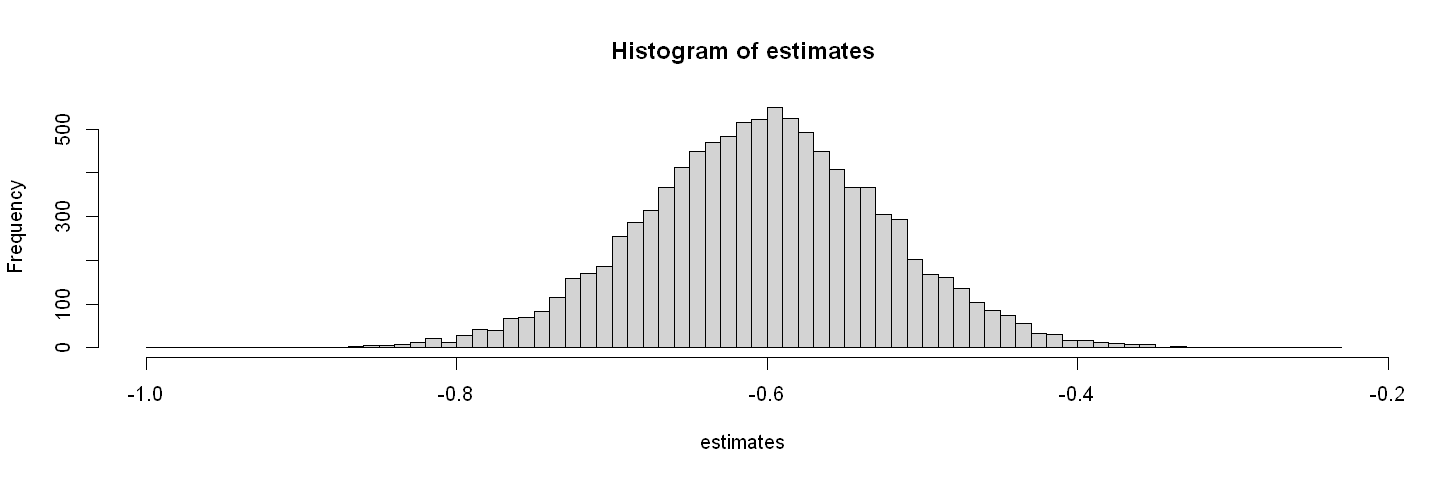

In [6]:
options(repr.plot.width=12, repr.plot.height=4)

hist(estimates, breaks=100)

In [7]:
print(c('Bootstrap estimate mean: ', round(mean(estimates), 3)), quote=F)
print(c('Bootstrap estimate SE:   ', round(sqrt(var(estimates)), 3)), quote=F)
print(c('5% percentile:           ', round(quantile(estimates, 0.05)[[1]], 3)), quote=F)
print(c('95% percentile:          ', round(quantile(estimates, 0.95)[[1]], 3)), quote=F)

[1] Bootstrap estimate mean:  -0.603                   
[1] Bootstrap estimate SE:    0.079                    
[1] 5% percentile:            -0.733                   
[1] 95% percentile:           -0.472                   


The large sample result from Equation (7.4.11) is 

$$ \text{Var}[\hat{\theta}] \approx \frac{1 - \theta^2}{n} $$

which is a variance of 0.00533, or a standard error of 0.073.  The bootstrap process produces a sampling distribution that seems to have a variance in line with this value, and an unbiased result.

**Exercise 7.13**. Simulate an AR(1) series with $\phi = 0.8$ and $n = 48$.

**(a)** Find the method-of-moments estimate of φ.

**(b)** Find the conditional least squares estimate of φ and compare it with part (a).

**(c)** Find the maximum likelihood estimate of φ and compare it with parts (a) and (b).

**(d)** Repeat parts (a), (b), and (c) with a new simulated series using the same parameters and same sample size. Compare your results with your results from the first simulation.

**Solution**.

In [8]:
estimate.ar1.mom <- function(x) {
    acf(x, lag.max=1, plot=F)$acf[2]
}

In [9]:
set.seed(0)
Y = arima.sim(model=list(ar=0.8), n=48)

**(a)**

In [10]:
print(c('Method of moments estimate:         ', round(estimate.ar1.mom(Y), 5)), quote=F)

[1] Method of moments estimate:          0.76759                             


**(b)**

In [11]:
print(c('Conditional least squares estimate: ', round(arima(Y, order=c(1,0,0), method='CSS')$coef[[1]], 5)), quote=F)

[1] Conditional least squares estimate:  0.78563                             


This is a better estimate than the one obtained in part (a).

**(c)**

In [12]:
print(c('Maximum likelihood estimate:        ', round(arima(Y, order=c(1,0,0), method='ML')$coef[[1]], 5)), quote=F)

[1] Maximum likelihood estimate:         0.77103                             


This is a better estimate than the one obtained in part (a), but worse than the CSS estimate.

**(d)**

In [13]:
set.seed(1)
Y = arima.sim(model=list(ar=0.8), n=48)
print(c('Method of moments estimate:         ', round(estimate.ar1.mom(Y), 5)), quote=F)
print(c('Conditional least squares estimate: ', round(arima(Y, order=c(1,0,0), method='CSS')$coef[[1]], 5)), quote=F)
print(c('Maximum likelihood estimate:        ', round(arima(Y, order=c(1,0,0), method='ML')$coef[[1]], 5)), quote=F)

[1] Method of moments estimate:          0.57289                             
[1] Conditional least squares estimate:  0.58319                             
[1] Maximum likelihood estimate:         0.624                               


For this random seed, all estimates seem poor -- though the MLE is better than the others.

**Exercise 7.14**.  Simulate an AR(1) series with $\phi = −0.5$ and $n = 60$.

**(a)** Find the method-of-moments estimate of $\phi$.

**(b)** Find the conditional least squares estimate of $\phi$ and compare it with part (a).

**(c)** Find the maximum likelihood estimate of $\phi$ and compare it with parts (a) and (b).

**(d)** Repeat parts (a), (b), and (c) with a new simulated series using the same parameters and same sample size. Compare your results with your results from the first simulation.

**Solution**.

In [14]:
set.seed(0)
Y = arima.sim(model=list(ar=-0.5), n=60)

**(a)**

In [15]:
print(c('Method of moments estimate:         ', round(estimate.ar1.mom(Y), 5)), quote=F)

[1] Method of moments estimate:          -0.46171                            


**(b)**

In [16]:
print(c('Conditional least squares estimate: ', round(arima(Y, order=c(1,0,0), method='CSS')$coef[[1]], 5)), quote=F)

[1] Conditional least squares estimate:  -0.46261                            


This result is almost the same as in (a).

**(c)**

In [17]:
print(c('Maximum likelihood estimate:        ', round(arima(Y, order=c(1,0,0), method='ML')$coef[[1]], 5)), quote=F)

[1] Maximum likelihood estimate:         -0.456                              


This result seems to be almost the same, but worse, than the other estimates obtained so far.

**(d)**

In [18]:
set.seed(1)
Y = arima.sim(model=list(ar=-0.5), n=60)
print(c('Method of moments estimate:         ', round(estimate.ar1.mom(Y), 5)), quote=F)
print(c('Conditional least squares estimate: ', round(arima(Y, order=c(1,0,0), method='CSS')$coef[[1]], 5)), quote=F)
print(c('Maximum likelihood estimate:        ', round(arima(Y, order=c(1,0,0), method='ML')$coef[[1]], 5)), quote=F)

[1] Method of moments estimate:          -0.48559                            
[1] Conditional least squares estimate:  -0.53617                            
[1] Maximum likelihood estimate:         -0.54812                            


Once again the method of moments estimate appears to be better, in comparison with the others.

**Exercise 7.15**.  Simulate an AR(1) series with $\phi = 0.7$ and $n = 100$.

**(a)** Find the maximum likelihood estimate of $\phi$.

**(b)** If your software permits, repeat part (a) many times with a new simulated series using the same parameters and same sample size.

**(c)** Form the sampling distribution of the maximum likelihood estimates of $\phi$.

**(d)** Are the estimates (approximately) unbiased?

**(e)** Calculate the variance of your sampling distribution and compare it with the large-sample result in Equation (7.4.9) on page 161.

**Solution**.

In [19]:
B = 10000
estimates = rep(NA, B)

set.seed(0)
pb = txtProgressBar(1, B, style=3)
for (i in 1:B) {
    estimates[i] = arima(arima.sim(model=list(ar=0.7), n=100), order=c(1,0,0), method='ML')$coef[[1]]
    setTxtProgressBar(pb, i)
}

  |======================================================================| 100%

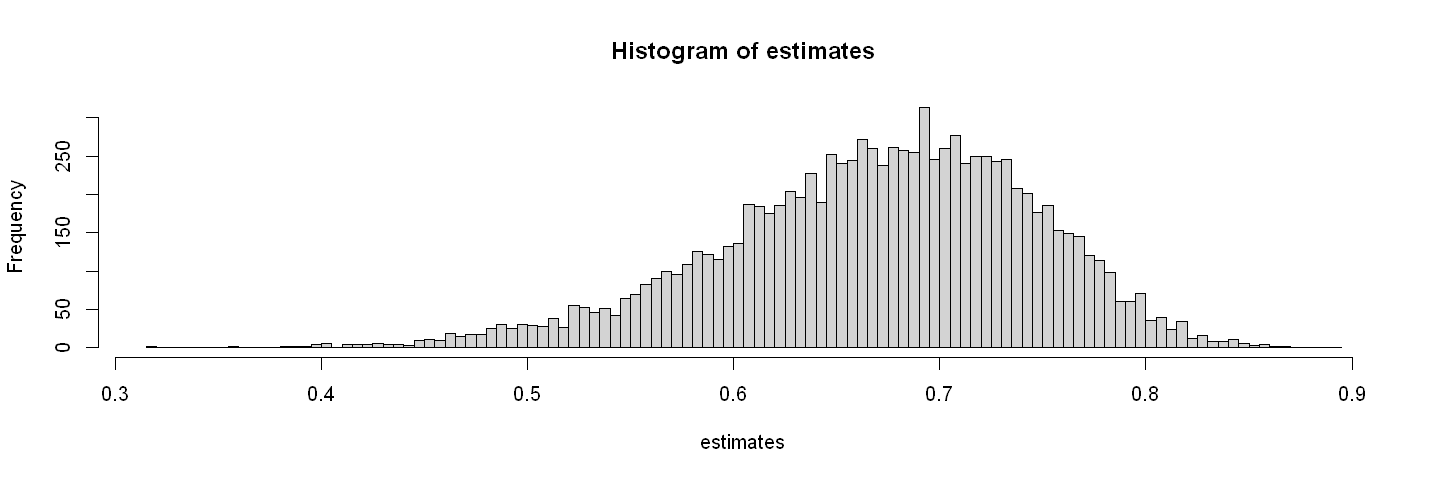

In [20]:
options(repr.plot.width=12, repr.plot.height=4)

hist(estimates, breaks=100)

In [21]:
print(c('Bootstrap estimate mean: ', round(mean(estimates), 3)), quote=F)
print(c('Bootstrap estimate SE:   ', round(sqrt(var(estimates)), 3)), quote=F)
print(c('5% percentile:           ', round(quantile(estimates, 0.05)[[1]], 3)), quote=F)
print(c('95% percentile:          ', round(quantile(estimates, 0.95)[[1]], 3)), quote=F)

[1] Bootstrap estimate mean:  0.669                    
[1] Bootstrap estimate SE:    0.076                    
[1] 5% percentile:            0.53                     
[1] 95% percentile:           0.78                     


The large sample result from Equation (7.4.9) is 

$$ \text{Var}[\hat{\theta}] \approx \frac{1 - \phi^2}{n} $$

which is a variance of 0.0051, or a standard error of 0.0714.  The bootstrap process produces a sampling distribution that seems to have a variance in line with this value, and an unbiased result.

**Exercise 7.16**.  Simulate an AR(2) series with $\phi_1 = 0.6$, $\phi_2 = 0.3$, and $n = 60$.

**(a)** Find the method-of-moments estimates of $\phi_1$ and $\phi_2$.

**(b)** Find the conditional least squares estimates of $\phi_1$ and $\phi_2$ and compare them with part (a).

**(c)** Find the maximum likelihood estimates of φ1 and φ2 and compare them with parts (a) and (b).

**(d)** Repeat parts (a), (b), and (c) with a new simulated series using the same parameters and same sample size. Compare these results to your results from the first simulation.

**Solution**.

In [22]:
set.seed(0)
Y = arima.sim(model=list(ar=c(0.6, 0.3)), n=60)

**(a)**

In [23]:
estimate.ar2.mom <- function(x) {
    ar(x, aic=F, order.max=2, method='yw')[[2]]
}

In [24]:
phi = estimate.ar2.mom(Y)

print(c('Method of moments estimate (phi1): ', round(phi[1], 5)), quote=F)
print(c('Method of moments estimate (phi2): ', round(phi[2], 5)), quote=F)

[1] Method of moments estimate (phi1):  0.40076                            
[1] Method of moments estimate (phi2):  0.26428                            


**(b)**

In [25]:
phi = arima(Y, order=c(2,0,0), method='CSS')$coef[-3]

print(c('Conditional least squares estimate (phi1): ', round(phi[[1]], 5)), quote=F)
print(c('Conditional least squares estimate (phi2): ', round(phi[[2]], 5)), quote=F)

[1] Conditional least squares estimate (phi1): 
[2] 0.35454                                    
[1] Conditional least squares estimate (phi2): 
[2] 0.34858                                    


Both estimate methods seem off from the true values, though the estimate for $\phi_2$ is slightly better on both.

**(c)**

In [26]:
phi = arima(Y, order=c(2,0,0), method='ML')$coef[-3]

print(c('Maximum likelihood estimate (phi1): ', round(phi[[1]], 5)), quote=F)
print(c('Maximum likelihood estimate (phi2): ', round(phi[[2]], 5)), quote=F)

[1] Maximum likelihood estimate (phi1):  0.41872                             
[1] Maximum likelihood estimate (phi2):  0.38248                             


The estimate still seems fairly off.

**(d)**

In [27]:
set.seed(1)
Y = arima.sim(model=list(ar=c(0.6, 0.3)), n=60)

phi = estimate.ar2.mom(Y)
print(c('Method of moments estimate (phi1): ', round(phi[1], 5)), quote=F)
print(c('Method of moments estimate (phi2): ', round(phi[2], 5)), quote=F)

phi = arima(Y, order=c(2,0,0), method='CSS')$coef[-3]
print(c('Conditional least squares estimate (phi1): ', round(phi[[1]], 5)), quote=F)
print(c('Conditional least squares estimate (phi2): ', round(phi[[2]], 5)), quote=F)

phi = arima(Y, order=c(2,0,0), method='ML')$coef[-3]
print(c('Maximum likelihood estimate (phi1): ', round(phi[[1]], 5)), quote=F)
print(c('Maximum likelihood estimate (phi2): ', round(phi[[2]], 5)), quote=F)

[1] Method of moments estimate (phi1):  0.54073                            
[1] Method of moments estimate (phi2):  0.26176                            
[1] Conditional least squares estimate (phi1): 
[2] 0.53274                                    
[1] Conditional least squares estimate (phi2): 
[2] 0.38063                                    
[1] Maximum likelihood estimate (phi1):  0.52336                             
[1] Maximum likelihood estimate (phi2):  0.36674                             


Values are somewhat closer to the true values, with some small differences in the results obtained by each method.

**Exercise 7.17**.  Simulate an ARMA(1,1) series with $\phi = 0.7$, $\theta = 0.4$, and $n = 72$.

**(a)** Find the method-of-moments estimates of $\phi$ and $\theta$.

**(b)** Find the conditional least squares estimates of $\phi$ and $\theta$ and compare them with part (a).

**(c)** Find the maximum likelihood estimates of $\phi$ and $\theta$ and compare them with parts (a) and (b).

**(d)** Repeat parts (a), (b), and (c) with a new simulated series using the same parameters and same sample size. Compare your new results with your results from the first simulation.

**Solution**.

In [28]:
set.seed(2000)
Y = arima.sim(model=list(ar=0.7, ma=-0.4), n=72)

**(a)**

In [29]:
estimate.arma11.mom <- function(x) {
    # estimate of phi:  r2 / r1
    # estimate of theta: solve r1 = (1 - theta phi) (phi - theta) / (1 - 2 theta phi + theta^2)
    #    (if it has real roots)
    
    r = acf(x, lag.max=2, plot=F)$acf[-1]
    r1 = r[1]
    r2 = r[2]
    phi = r2 / r1
    delta = (phi**2 - 1)*(phi**2 - 4 *phi *r1 + 4*r1**2 - 1)
    if (delta < 0) {
        theta = NA
    } else {
        theta = ((phi**2 - 2 * phi * r1 + 1) - sqrt(delta)) / (2 * (phi - r1))
    }
    return(c(phi, theta))
}

In [30]:
res = estimate.arma11.mom(Y)
print(c('Method of moments estimate (phi): ', round(res[1], 5)), quote=F)
print(c('Method of moments estimate (theta): ', round(res[2], 5)), quote=F)

[1] Method of moments estimate (phi):  0.43128                           
[1] Method of moments estimate (theta):  -0.06424                            


**(b)**

In [31]:
res = arima(Y, order=c(1,0,1), method='CSS')$coef

print(c('Conditional least squares estimate (phi): ', round(res[[1]], 5)), quote=F)
print(c('Conditional least squares estimate (theta): ', round(-res[[2]], 5)), quote=F)

[1] Conditional least squares estimate (phi): 
[2] 0.42449                                   
[1] Conditional least squares estimate (theta): 
[2] -0.07356                                    


Estimates for $\theta$ seem very off in both methods.  Estimates for $\phi$ are also very off, but at least has the right sign.

**(c)**

In [32]:
res = arima(Y, order=c(1,0,1), method='ML')$coef

print(c('Maximum likelihood estimate (phi): ', round(res[[1]], 5)), quote=F)
print(c('Maximum likelihood estimate (theta): ', round(-res[[2]], 5)), quote=F)

[1] Maximum likelihood estimate (phi):  0.43128                            
[1] Maximum likelihood estimate (theta):  -0.05791                             


Estimates are very similar to the estimates using CSS (and also very off the true values).

**(d)**

In [33]:
set.seed(10000)
Y = arima.sim(model=list(ar=0.7, ma=-0.4), n=72)

res = estimate.arma11.mom(Y)
print(c('Method of moments estimate (phi): ', round(res[1], 5)), quote=F)
print(c('Method of moments estimate (theta): ', round(res[2], 5)), quote=F)

res = arima(Y, order=c(1,0,1), method='CSS')$coef
print(c('Conditional least squares estimate (phi): ', round(res[[1]], 5)), quote=F)
print(c('Conditional least squares estimate (theta): ', round(-res[[2]], 5)), quote=F)

res = arima(Y, order=c(1,0,1), method='ML')$coef
print(c('Maximum likelihood estimate (phi): ', round(res[[1]], 5)), quote=F)
print(c('Maximum likelihood estimate (theta): ', round(-res[[2]], 5)), quote=F)

[1] Method of moments estimate (phi):  0.47988                           
[1] Method of moments estimate (theta):  0.30173                             
[1] Conditional least squares estimate (phi): 
[2] 0.36282                                   
[1] Conditional least squares estimate (theta): 
[2] 0.17727                                     
[1] Maximum likelihood estimate (phi):  0.35213                            
[1] Maximum likelihood estimate (theta):  0.15978                              


The method of moment estimates are now much closer to the real values, while the other estimates are still fairly off.

**Exercise 7.18**.  Simulate an AR(1) series with $\phi = 0.6$, $n = 36$ but with error terms from a t-distribution with 3 degrees of freedom.

**(a)** Display the sample PACF of the series. Is an AR(1) model suggested?

**(b)** Estimate $\phi$ from the series and comment on the results.

**(c)** Repeat parts (a) and (b) with a new simulated series under the same conditions.

**Solution**.

In [34]:
set.seed(1000)
Y = arima.sim(model=list(ar=0.6), n=36, innov=rt(36, 3))

In [35]:
plot_acf_with_bounds <- function(acf, lower, upper, title='ACF') {
    max_k = length(acf)
    k = seq(1, max_k)
    
    options(repr.plot.width=12, repr.plot.height=4)
    p = ggplot() + geom_ribbon(aes(x=k, ymin=lower, ymax=upper), fill='blue', alpha=0.1) +
        geom_point(aes(x=k, y=acf), color='blue')
    for (i in 1:max_k) {
        p = p + geom_line(aes_string(x=k[i], y=c(0, acf[i])), color='blue')
    }
    p + geom_line(aes(x=k, y=0), color='blue', linetype='dashed') +
        xlab('Lag') + ylab(TeX('$\\rho_k$')) +
        ggtitle(title) +
        theme_bw() + theme(text = element_text(size=16), plot.title = element_text(hjust = 0.5))
}

**(a)**

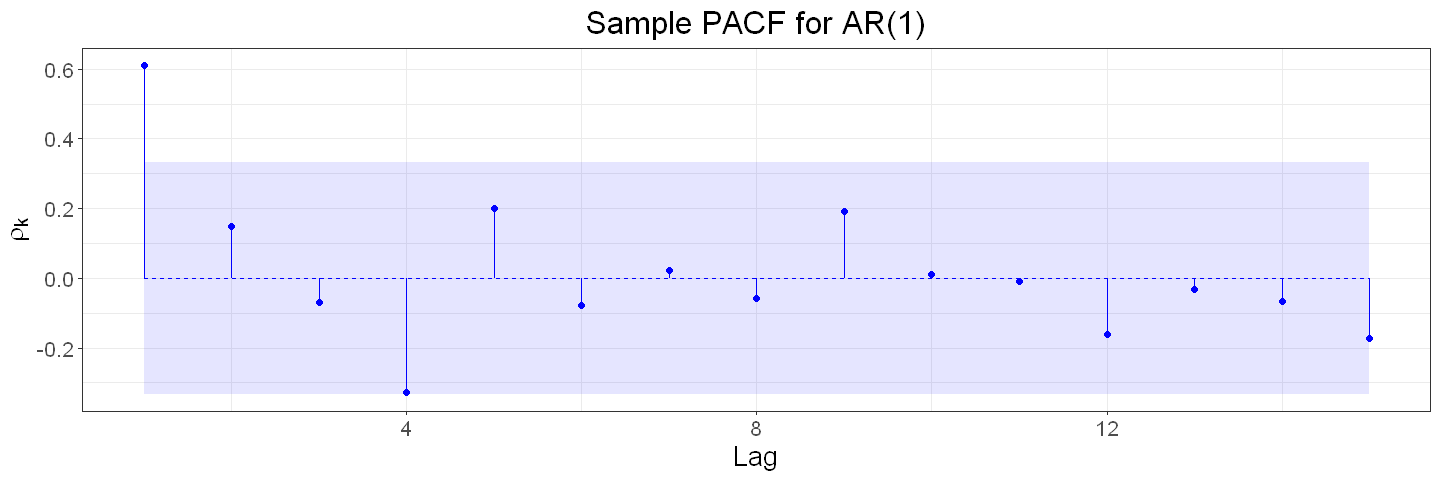

In [36]:
r = pacf(Y, lag.max=15, plot=F)$acf
se = 1 / sqrt(length(Y))

plot_acf_with_bounds(r, - 2 * se, + 2*se, title='Sample PACF for AR(1)')

This PACF suggests an AR(1) process.

**(b)**

In [37]:
print(c('Method of moments estimate:  ', round(estimate.ar1.mom(Y), 5)), quote=F)
print(c('Maximum likelihood estimate: ', round(arima(Y, order=c(1,0,0), method='ML')$coef[[1]], 5)), quote=F)

[1] Method of moments estimate:   0.61083                      
[1] Maximum likelihood estimate:  0.61296                      


The maximum likelihood and the method of moments estimates suggest $\phi = 0.61$, very close to the true value despite errors not being normal.

**(c)**

[1] Method of moments estimate:   0.45793                      
[1] Maximum likelihood estimate:  0.47753                      


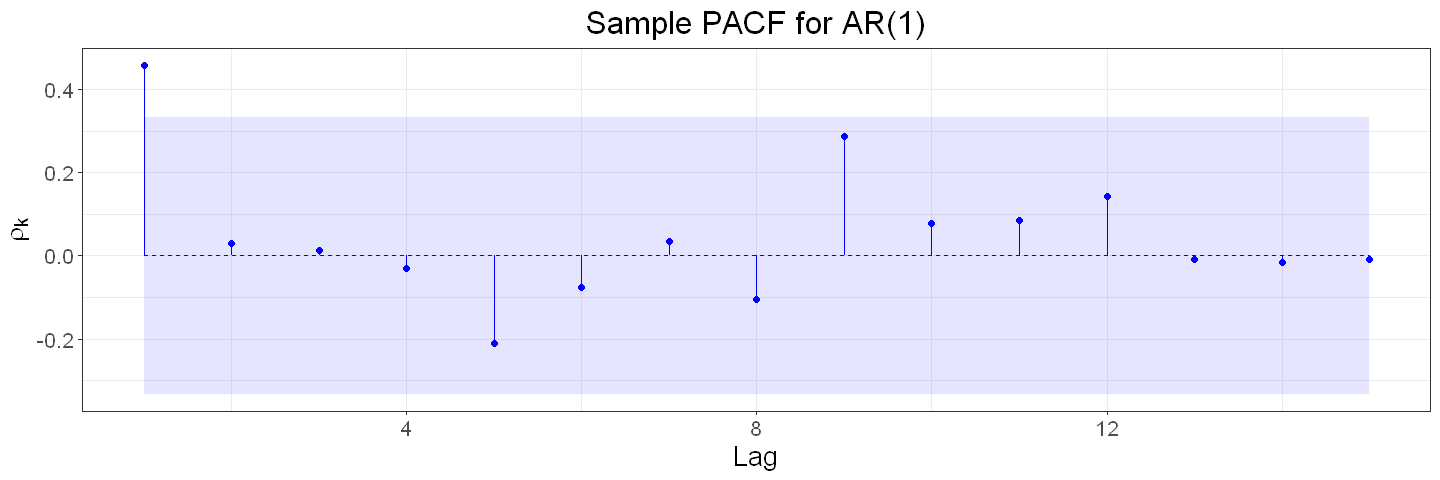

In [38]:
set.seed(1001)
Y = arima.sim(model=list(ar=0.6), n=36, innov=rt(36, 3))
r = pacf(Y, lag.max=15, plot=F)$acf
se = 1 / sqrt(length(Y))
plot_acf_with_bounds(r, - 2 * se, + 2*se, title='Sample PACF for AR(1)')
print(c('Method of moments estimate:  ', round(estimate.ar1.mom(Y), 5)), quote=F)
print(c('Maximum likelihood estimate: ', round(arima(Y, order=c(1,0,0), method='ML')$coef[[1]], 5)), quote=F)

PACF again suggests AR(1), but now method of moments suggests $\theta=0.458$ and maximum likelihood suggests $\phi=0.478$, which is not as close to the true value.

**Exercise 7.19**.  Simulate an MA(1) series with $\theta = −0.8$, $n = 60$ but with error terms from a t-distribution with 4 degrees of freedom.

**(a)** Display the sample ACF of the series. Is an MA(1) model suggested?

**(b)** Estimate θ from the series and comment on the results.

**(c)** Repeat parts (a) and (b) with a new simulated series under the same conditions.

**Solution**.

In [39]:
set.seed(1000)
Y = arima.sim(model=list(ma=0.8), n=60, innov=rt(60, 4))

In [40]:
estimate.ma1.mom <- function(x) {
    r = acf(x, lag.max=1, plot=F)$acf[2]; 
    if (abs(r) < 0.5) {
        return((-1+sqrt(1-4*r^2))/(2*r)) 
    } else {
        return(NA)
    }
}

**(a)**

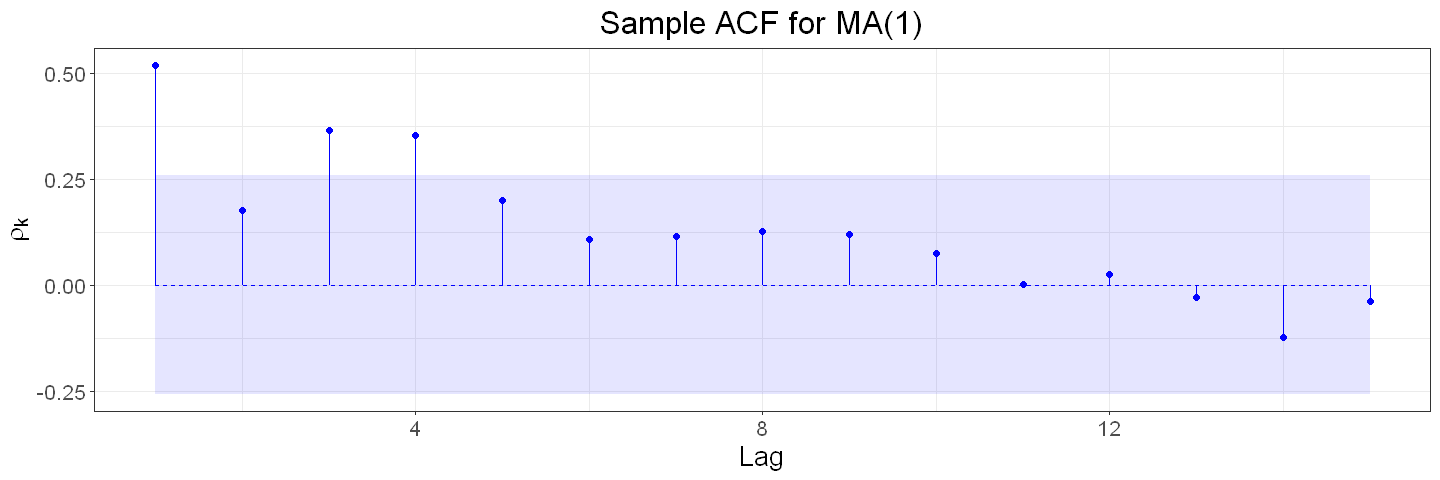

In [41]:
r = acf(Y, lag.max=15, plot=F)$acf[-1]
se = 1 / sqrt(length(Y))
plot_acf_with_bounds(r, - 2 * se, + 2*se, title='Sample ACF for MA(1)')

ACF suggests an MA(1) process -- though lags at 3, 4 might need to be investigated.

**(b)**

In [42]:
print(c('Method of moments estimate:  ', round(estimate.ma1.mom(Y), 5)), quote=F)
print(c('Maximum likelihood estimate: ', round(-arima(Y, order=c(0,0,1), method='ML')$coef[[1]], 5)), quote=F)

[1] Method of moments estimate:   <NA>                         
[1] Maximum likelihood estimate:  -1                           


The maximum likelihood estimate estimate is just $\theta = -1$, which is not invertible, while the method of moments estimate fails to provide an estimate.

**(c)**

[1] Method of moments estimate:   -0.74515                     
[1] Maximum likelihood estimate:  -0.89504                     


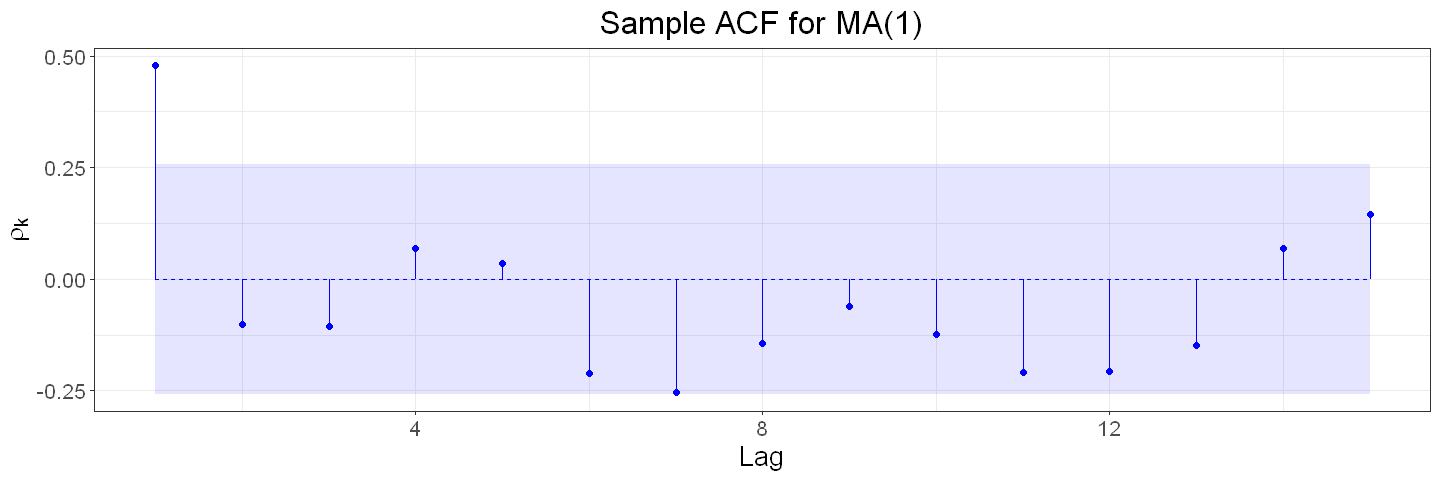

In [43]:
set.seed(1001)
Y = arima.sim(model=list(ma=0.8), n=60, innov=rt(60, 4))
r = acf(Y, lag.max=15, plot=F)$acf[-1]
se = 1 / sqrt(length(Y))
plot_acf_with_bounds(r, - 2 * se, + 2*se, title='Sample ACF for MA(1)')
print(c('Method of moments estimate:  ', round(estimate.ma1.mom(Y), 5)), quote=F)
print(c('Maximum likelihood estimate: ', round(-arima(Y, order=c(0,0,1), method='ML')$coef[[1]], 5)), quote=F)

ACF still suggests an MA(1) process.  The method of moments estimate is very off at $\theta=-0.74$, but the maximum likelihood estimate is closer to the true value, estimating $\theta = -0.895$.

**Exercise 7.20**. Simulate an AR(2) series with $\phi_1 = 1.0$, $\phi_2 = −0.6$, $n = 48$ but with error terms from a t-distribution with 5 degrees of freedom.

**(a)** Display the sample PACF of the series. Is an AR(2) model suggested?

**(b)** Estimate $\phi_1$ and $\phi_2$ from the series and comment on the results.

**(c)** Repeat parts (a) and (b) with a new simulated series under the same conditions.

**Solution**.

In [44]:
set.seed(5000)
Y = arima.sim(model=list(ar=c(1, -0.6)), n=48, innov=rt(48, 5))

**(a)**

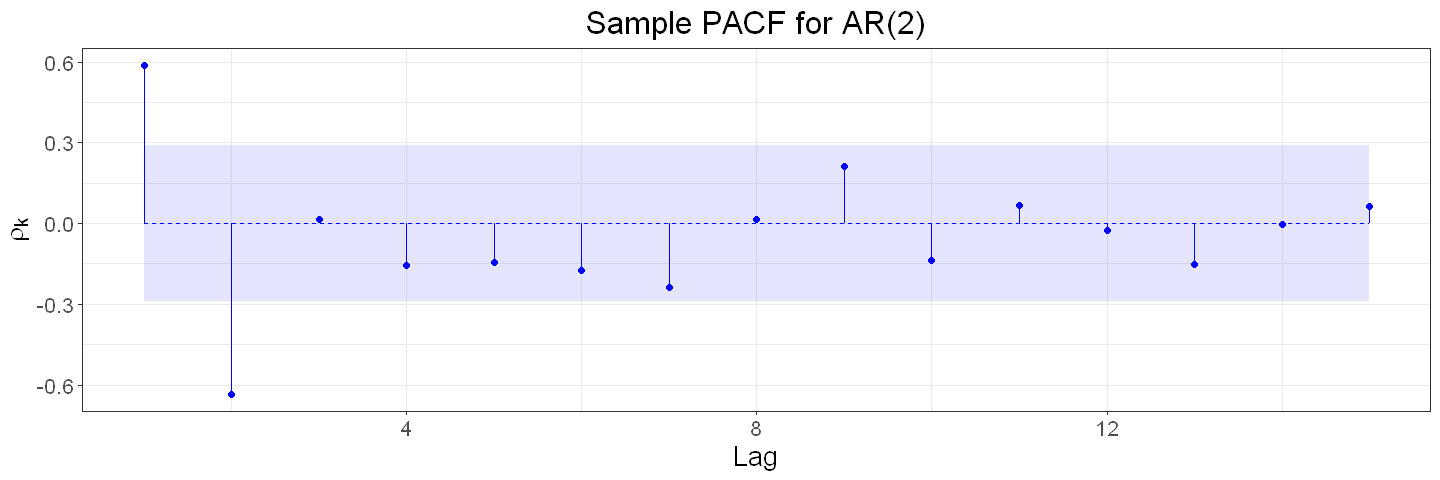

In [45]:
r = pacf(Y, lag.max=15, plot=F)$acf
se = 1 / sqrt(length(Y))

plot_acf_with_bounds(r, - 2 * se, + 2*se, title='Sample PACF for AR(2)')

The PACF plot does suggest an AR(2) process.

In [46]:
phi = estimate.ar2.mom(Y)
print(c('Method of moments estimate (phi1): ', round(phi[1], 5)), quote=F)
print(c('Method of moments estimate (phi2): ', round(phi[2], 5)), quote=F)

phi = arima(Y, order=c(2,0,0), method='ML')$coef[-3]
print(c('Maximum likelihood estimate (phi1): ', round(phi[[1]], 5)), quote=F)
print(c('Maximum likelihood estimate (phi2): ', round(phi[[2]], 5)), quote=F)

[1] Method of moments estimate (phi1):  0.96136                            
[1] Method of moments estimate (phi2):  -0.6357                            
[1] Maximum likelihood estimate (phi1):  0.96626                             
[1] Maximum likelihood estimate (phi2):  -0.64433                            


The estimates from both the method of moments and from maximum likelihood are reasonable, respectively being $(\phi_1, \phi_2) = (0.961, -0.356)$ and $(\phi_1, \phi_2) = (0.988, -0.644)$.

**(c)**

[1] Method of moments estimate (phi1):  1.09227                            
[1] Method of moments estimate (phi2):  -0.53049                           
[1] Maximum likelihood estimate (phi1):  1.09576                             
[1] Maximum likelihood estimate (phi2):  -0.54674                            


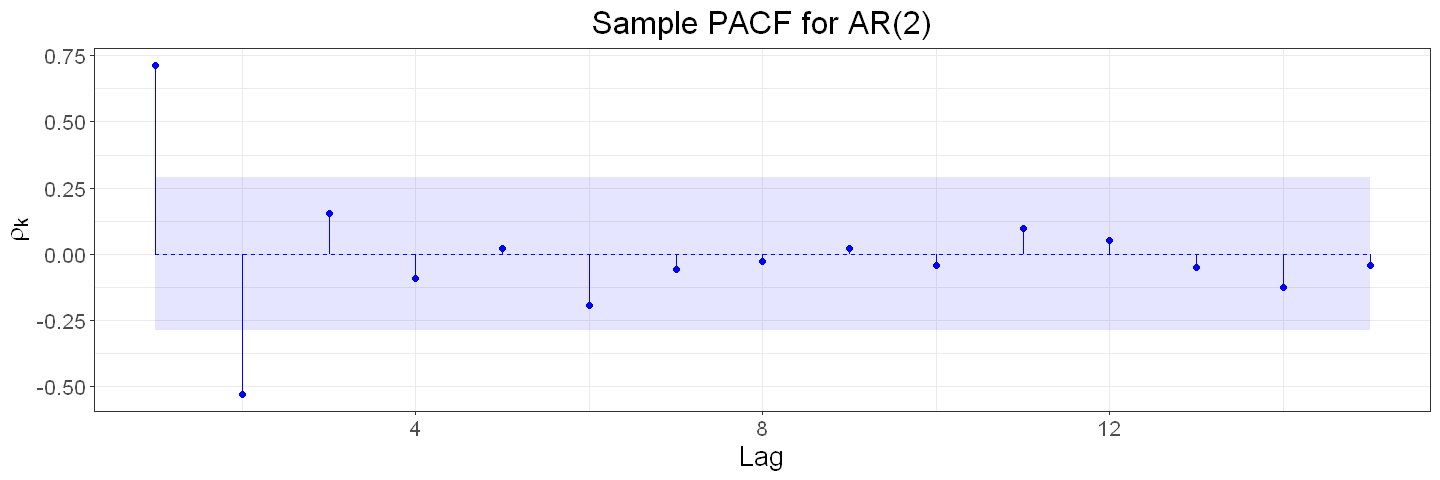

In [47]:
set.seed(5001)
Y = arima.sim(model=list(ar=c(1, -0.6)), n=48, innov=rt(48, 5))

r = pacf(Y, lag.max=15, plot=F)$acf
se = 1 / sqrt(length(Y))
plot_acf_with_bounds(r, - 2 * se, + 2*se, title='Sample PACF for AR(2)')

phi = estimate.ar2.mom(Y)
print(c('Method of moments estimate (phi1): ', round(phi[1], 5)), quote=F)
print(c('Method of moments estimate (phi2): ', round(phi[2], 5)), quote=F)

phi = arima(Y, order=c(2,0,0), method='ML')$coef[-3]
print(c('Maximum likelihood estimate (phi1): ', round(phi[[1]], 5)), quote=F)
print(c('Maximum likelihood estimate (phi2): ', round(phi[[2]], 5)), quote=F)

PACF still indicates an AR(2) process.  The estimates now are less accurate, with method of moments estimating $(\phi_1, \phi_2) = (1.092, -0.53)$ and maximum likelihood estimating $(\phi_1, \phi_2) = (1.096, -0.547)$.